In [12]:
#!pip install gensim

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Comnews_2025.csv') #загружаем собранный корпус статей
#также выложен на HF как 'Darhel/ITNews_ru'
df

,date,topic,title,text,link
0,2025-06-27,Спутниковая связь,KazSat-3 станет первым и последним,Новый спутник будет выведен в орбитальную пози...,https://www.comnews.ru/content/239873/2025-06-...
1,2025-06-27,Регионы•СФО,Новосибирская область первой в России внедрила...,Одной из приоритетных задач оперативных подраз...,https://www.comnews.ru/content/239899/2025-06-...
2,2025-06-27,Регионы•СФО,Крупнейший частный медицинский центр Новосибир...,"""Группа Астра"" успешно завершила внедрение в И...",https://www.comnews.ru/content/239896/2025-06-...
3,2025-06-27,РФ•ЦФО,"""РТК-ЦОД"" запустил третью очередь Центра обраб...","""РТК-ЦОД"" (кластер ЦОД и облачных сервисов ""Ро...",https://www.comnews.ru/content/239894/2025-06-...
4,2025-06-27,Искусственный интеллект и сквозные технологии•...,Две из трех компаний увеличат инвестиции в бол...,"Таковы результаты анонимного опроса ООО ""К2 Те...",https://www.comnews.ru/content/239885/2025-06-...
...,...,...,...,...,...
7975,2022-01-11,Регионы•РФ•ЦФО,Автоматизированные информационные системы позв...,Губернатор Рязанской области Николай Любимов п...,https://www.comnews.ru/content/218188/2022-01-...
7976,2022-01-11,Регионы•РФ•ЦФО,"В Белгородской области установлено 11,5 тысяч ...",Цифровой контроль выявления наполняемости мусо...,https://www.comnews.ru/content/218185/2022-01-...
7977,2022-01-11,M&A,Softline купил Академию,Softline сегодня объявил о подписании соглашен...,https://www.comnews.ru/content/218217/2022-01-...
7978,2022-01-11,Беспроводная связь,Операторы сделали ход конем,Мобильная связь в России по итогам 2021 г. ста...,https://www.comnews.ru/content/218191/2022-01-...


# 1. Препроцессинг

In [15]:
import nltk
from nltk import download
download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
ru_stop_words = stopwords.words('russian') + ['который', 'это', 'год', 'компания']

In [17]:
# лемматизируем тексты
from pymystem3 import Mystem
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [18]:
def lemm_mystem(text):
  lemm = mystem.lemmatize(text.lower())
  lemm_clean = [word for word in lemm if word not in ru_stop_words and word[0].isalpha()]
  return " ".join(lemm_clean)

In [19]:
df['text'] = df['text'].apply(lemm_mystem)
df

,date,topic,title,text,link
0,2025-06-27,Спутниковая связь,KazSat-3 станет первым и последним,новый спутник выводить орбитальный позиция вос...,https://www.comnews.ru/content/239873/2025-06-...
1,2025-06-27,Регионы•СФО,Новосибирская область первой в России внедрила...,приоритетный задача оперативный подразделение ...,https://www.comnews.ru/content/239899/2025-06-...
2,2025-06-27,Регионы•СФО,Крупнейший частный медицинский центр Новосибир...,группа астра успешно завершать внедрение ита и...,https://www.comnews.ru/content/239896/2025-06-...
3,2025-06-27,РФ•ЦФО,"""РТК-ЦОД"" запустил третью очередь Центра обраб...",ртк цод кластер цод облачный сервис ростелеком...,https://www.comnews.ru/content/239894/2025-06-...
4,2025-06-27,Искусственный интеллект и сквозные технологии•...,Две из трех компаний увеличат инвестиции в бол...,таков результат анонимный опрос ооо к2 принима...,https://www.comnews.ru/content/239885/2025-06-...
...,...,...,...,...,...
7975,2022-01-11,Регионы•РФ•ЦФО,Автоматизированные информационные системы позв...,губернатор рязанский область николай любимов п...,https://www.comnews.ru/content/218188/2022-01-...
7976,2022-01-11,Регионы•РФ•ЦФО,"В Белгородской области установлено 11,5 тысяч ...",цифровой контроль выявление наполняемость мусо...,https://www.comnews.ru/content/218185/2022-01-...
7977,2022-01-11,M&A,Softline купил Академию,softline сегодня объявлять подписание соглашен...,https://www.comnews.ru/content/218217/2022-01-...
7978,2022-01-11,Беспроводная связь,Операторы сделали ход конем,мобильный связь россия итог г становиться самы...,https://www.comnews.ru/content/218191/2022-01-...


# 2. Векторизуем тексты

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(max_df=0.7, min_df=5, # игнорируем слова,которые только в 5 документах или в 70% документов.
                                stop_words=ru_stop_words)

In [22]:
news = list(df['text'].tolist())

In [23]:
vectors = vectorizer.fit_transform(news)

In [24]:
vectors.shape

(7980, 16644)

# 3. Определяем оптимальное число кластеров

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

Получим лучший результат по трем метрикам

In [154]:
%%time
K = range(5, 15)
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in K:
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    labels_pred = km.fit_predict(vectors)
    # Метрика силуэта
    silhouette_scores.append(silhouette_score(vectors, labels_pred))
    # Метрика Davies-Bouldin
    davies_bouldin_scores.append(davies_bouldin_score(vectors.toarray(), labels_pred))
    # Метрика Calinski-Harabasz
    calinski_harabasz_scores.append(calinski_harabasz_score(vectors.toarray(), labels_pred))

CPU times: user 3min 7s, sys: 18.9 s, total: 3min 26s
Wall time: 3min 22s


Визуализируем метрики

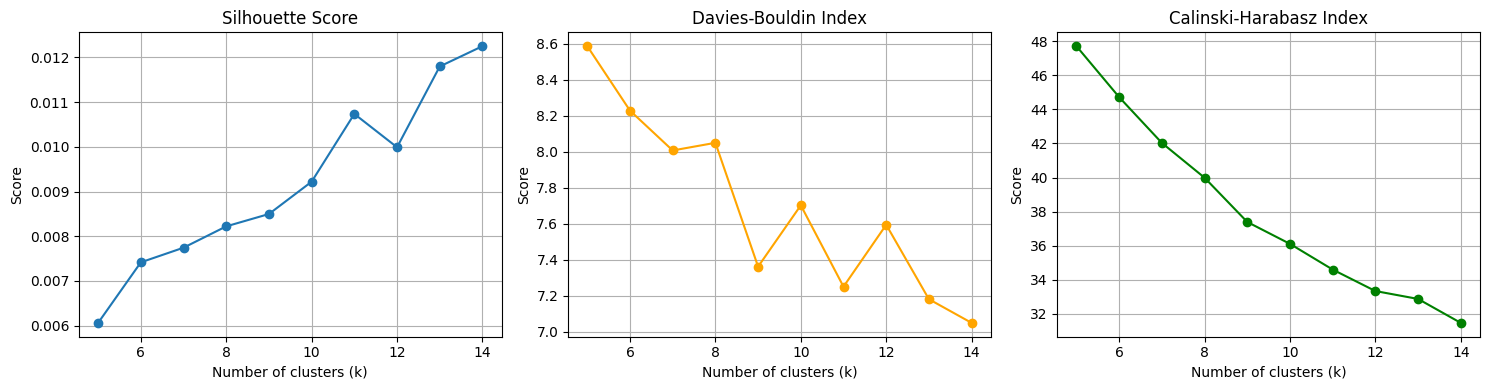

In [155]:
plt.figure(figsize=(15, 4))

# Silhouette Score

plt.subplot(1, 3, 1)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.grid(True)

# Davies-Bouldin Index (индекс Дэвиса-Болдуина)

plt.subplot(1, 3, 2)
plt.plot(K, davies_bouldin_scores, marker='o', color='orange')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.grid(True)

# Calinski-Harabasz Index (индекс Цалински-Харабаша)
plt.subplot(1, 3, 3)
plt.plot(K, calinski_harabasz_scores, marker='o', color='green')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [156]:
# Выбор лучшего k

best_k_silhouette = K[np.argmax(silhouette_scores)]
best_k_davies_bouldin = K[np.argmin(davies_bouldin_scores)] #тут смотрим на минимальное значение, в остальных случаях - на максимум
best_k_calinski = K[np.argmax(calinski_harabasz_scores)]

print(f"Лучшее k по Silhouette Score: {best_k_silhouette} (Score: {max(silhouette_scores):.3f})")
print(f"Лучшее k по индексу Davies-Bouldin: {best_k_davies_bouldin} (Score: {min(davies_bouldin_scores):.3f})")
print(f"Лучшее k по индексу Calinski-Harabasz Index: {best_k_calinski} (Score: {max(calinski_harabasz_scores):.3f})")

Лучшее k по Silhouette Score: 14 (Score: 0.012)
Лучшее k по индексу Davies-Bouldin: 14 (Score: 7.051)
Лучшее k по индексу Calinski-Harabasz Index: 5 (Score: 47.704)


In [157]:
# Нормализуем метрики, чтобы сравнивать их в одной шкале

silhouette_norm = (np.array(silhouette_scores) - np.min(silhouette_scores)) / (np.max(silhouette_scores) - np.min(silhouette_scores))
calinski_norm = (np.array(calinski_harabasz_scores) - np.min(calinski_harabasz_scores)) / (np.max(calinski_harabasz_scores) - np.min(calinski_harabasz_scores))
# Для davies_bouldin, так как меньшие значения лучше, возьмем обратное или нормируем так, чтобы лучшее было ближе к 1
davies_bouldin_norm = 1 - (np.array(davies_bouldin_scores) - np.min(davies_bouldin_scores)) / (np.max(davies_bouldin_scores) - np.min(davies_bouldin_scores))

# Взвешенное усреднение (зададим равные веса)

weights = [1, 1, 1]
combined_scores = (silhouette_norm * weights[0] +
                   davies_bouldin_norm * weights[1] +
                   calinski_norm * weights[2]) / sum(weights)

# Выбираем `k` с наивысшим объединенным рейтингом

best_index = np.argmax(combined_scores)
best_k = K[best_index]

print(f"Лучшее k по объединенной метрике: {best_k}")

Лучшее k по объединенной метрике: 14


# 4. Кластеризация

In [158]:
kmeans = KMeans(n_clusters=best_k, n_init=10, max_iter=300, random_state=42)
clusters = kmeans.fit_predict(vectors)

In [159]:
# Посмотрим, сколько текстов в каждом кластере

for cluster_num in np.unique(kmeans.labels_):
    count = np.sum(kmeans.labels_ == cluster_num)
    print(f"Кластер {cluster_num}: {count} текстов")

Кластер 0: 847 текстов
Кластер 1: 617 текстов
Кластер 2: 302 текстов
Кластер 3: 274 текстов
Кластер 4: 193 текстов
Кластер 5: 928 текстов
Кластер 6: 183 текстов
Кластер 7: 1854 текстов
Кластер 8: 230 текстов
Кластер 9: 414 текстов
Кластер 10: 234 текстов
Кластер 11: 355 текстов
Кластер 12: 419 текстов
Кластер 13: 1130 текстов


Визуализируем кластеры

In [160]:
from sklearn.metrics import silhouette_samples

In [161]:
samples_silhouettes = silhouette_samples(vectors, kmeans.labels_)

In [162]:
silhouette_avg = silhouette_score(vectors, kmeans.labels_)

In [163]:
n_clusters=best_k

In [164]:
# код: https://www.kaggle.com/code/realstay/clustering-with-silhouette-plot-elbow-method

def plot_silhouettes(samples_silhouettes, labels, n_clusters, silhouette_avg):
  fig, ax = plt.subplots()
  y_lower = 10

  for i in range(n_clusters):
      ith_cluster_silhouette_values = samples_silhouettes[labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i


      ax.fill_betweenx(np.arange(y_lower,y_upper),
                      0,
                      ith_cluster_silhouette_values,
                      alpha=0.3)

      #label the silhouse plots with their cluster numbers at the middle
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      #compute the new y_lower for next plot
      y_lower = y_upper +10

  ax.set_title("Silhouette plot")
  ax.set_xlabel("Silhouette score")
  ax.set_ylabel("Cluster label")

  #the vertical line for average silhouette score of all the values
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax.set_yticks([])
  ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

  plt.show()

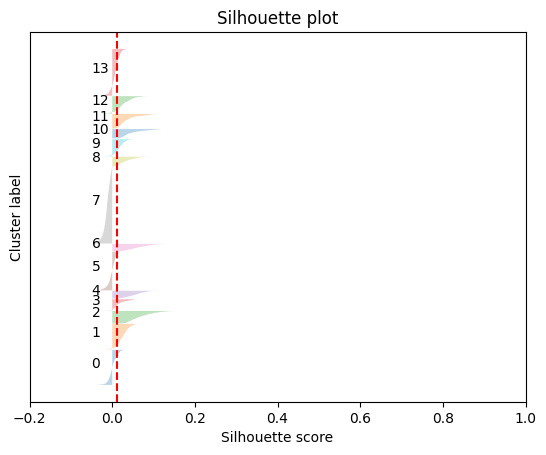

In [165]:
plot_silhouettes(samples_silhouettes, kmeans.labels_, n_clusters, silhouette_avg)

Визуализация с TSNE



In [166]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm  # Импортируем colormap

/tmp/ipython-input-167-578784982.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Set2', num_clusters)


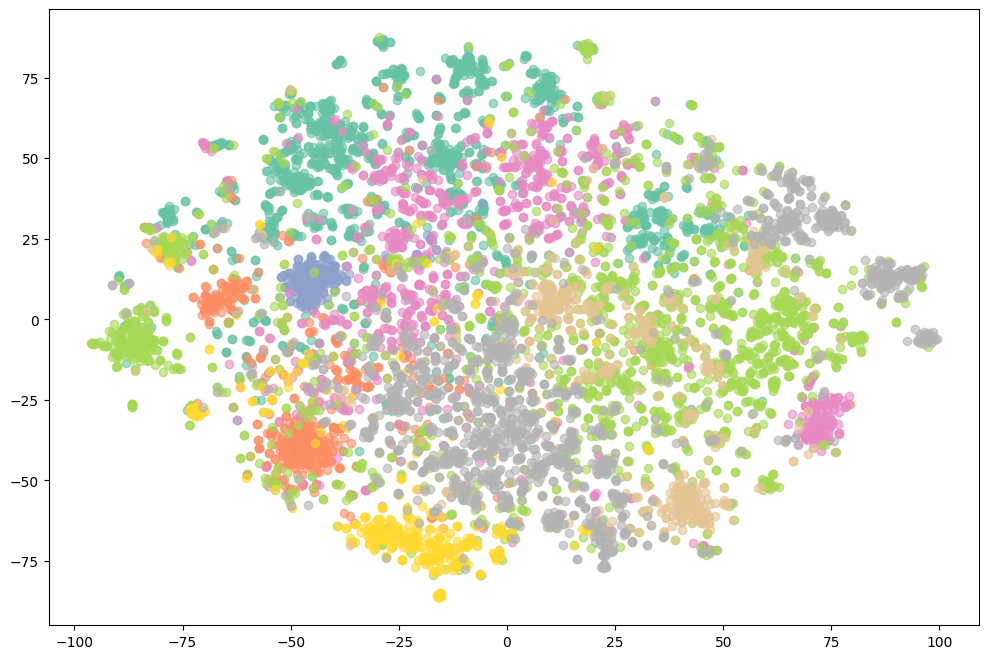

In [167]:
# Визуализация кластеров

tsne = TSNE(n_components=2, init='random')
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(12, 8))
num_clusters = len(np.unique(clusters))
colors = cm.get_cmap('Set2', num_clusters)

for i in range(num_clusters):
  plt.scatter(
      vectors_2d[clusters == i, 0],
      vectors_2d[clusters == i, 1],
      label=f'Кластер {i+1}',
      alpha=0.6,
      color=colors(i)
      )


# 5. Определение тем кластеров

In [168]:
from gensim import corpora
from gensim.models import LdaModel

In [169]:
# Создаем столбец с метками кластеров

df['cluster'] = clusters

In [170]:
# Применияем модель LDA для каждого кластера отдельно, чтобы найти топ-10 слов

topics = {}
for cluster_num in range(best_k):
    texts_in_cluster = df[df['cluster'] == cluster_num]['text']
    tokenized_texts = [text.split() for text in texts_in_cluster] #текст уже был токенизирован, поэтому просто сплит

    # Создаем словарь и корпус для Gensim
    dictionary = corpora.Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

    # Обучение LDA модели для каждого кластера
    lda = LdaModel(corpus, num_topics=1, id2word=dictionary, passes=10)

    # Извлечение ключевых слов
    keywords = lda.show_topic(0, topn=10)
    topics[cluster_num] = [word for word, prob in keywords]

In [171]:
# Cписок 10 ключевых слов для каждого кластера

for cluster_num, words in topics.items():
    print(f"Тема кластера {cluster_num}: {', '.join(words)}")

Тема кластера 0: система, проект, работа, город, позволять, также, транспорт, цифровой, решение, весь
Тема кластера 1: связь, оператор, сеть, г, интернет, мобильный, оборудование, станция, весь, услуга
Тема кластера 2: ия, технология, интеллект, искусственный, решение, данные, мочь, система, развитие, также
Тема кластера 3: производство, предприятие, система, оборудование, проект, российский, технология, продукция, промышленный, развитие
Тема кластера 4: медицинский, пациент, врач, система, здравоохранение, данные, цифровой, весь, сервис, технология
Тема кластера 5: цифровой, система, проект, информационный, развитие, работа, область, государственный, также, регион
Тема кластера 6: данные, утечка, персональный, мочь, информация, защита, штраф, также, система, данный
Тема кластера 7: россия, российский, мочь, г, также, весь, сервис, рынок, пользователь, новый
Тема кластера 8: система, спутник, космический, связь, спутниковый, г, проект, аппарат, российский, россия
Тема кластера 9: специ

In [172]:
#Для спорных кластеров смотрим примеры текстов

cluster_number = 7

# Получаем первые 5 текстов из этого кластера
examples = df[df['cluster'] == cluster_number]['text'].head(20)

for i, text in enumerate(examples, start=1):
    print(f"Пример {i}:\n{text}\n")

Пример 1:
ртк цод кластер цод облачный сервис ростелеком вводить эксплуатация третий очередь центр обработка данные цод удомля инвестиция строительство составлять млрд рубль третий очередь дата центр располагать четыре машинный зал стойка мощность квт каждый проектирование начинаться конец комплексный испытание завершаться май запуск площадка эксплуатация осуществлять июнь удомля спроектировать соответствие требование надежность уровень tier iii бесперебойный электропитание ита инфраструктура обеспечивать шесть автономный дизель генераторный установка мощность квт резервирование независимый луч электропитание система холодоснабжение выполнять кольцевой схема общий холодопроизводительность кондиционер каждый машинный зал составлять квт сегодня время высокий спрос мощность цод страна реализовать наш команда проект оказываться максимально востребовать сторона клиент больший часть мощность новый очередь запуск находить свой арендатор кластер цод удомля стремительно развиваться несмотря уда

In [173]:
# Темы понятны, поэтому создаем словарь для соответствия номера кластера и темы

cluster_names = {
    0: "Умный город",
    1: "Связь и телекоммуникации",
    2: "Искусственный интеллект",
    3: "Оборудование для ИТ",
    4: "Технологии в медицине",
    5: "Цифровизация регионов",
    6: "Персональные данные",
    7: "Регулирование ИТ-рынка",
    8: "Спутниковая связь",
    9: "Образование и кадры",
    10: "Информационная безопасность",
    11: "Исследования рынка",
    12: "Финансовые технологии",
    13: "Импортозамещение",
}

In [174]:
# проставим темы к каждому тексту
df['cluster_label'] = [cluster_names[label] for label in clusters]
df

,date,topic,title,text,link,cluster,cluster_label,year_month
0,2025-06-27,Спутниковая связь,KazSat-3 станет первым и последним,новый спутник выводить орбитальный позиция вос...,https://www.comnews.ru/content/239873/2025-06-...,8,Спутниковая связь,2025-06
1,2025-06-27,Регионы•СФО,Новосибирская область первой в России внедрила...,приоритетный задача оперативный подразделение ...,https://www.comnews.ru/content/239899/2025-06-...,0,Умный город,2025-06
2,2025-06-27,Регионы•СФО,Крупнейший частный медицинский центр Новосибир...,группа астра успешно завершать внедрение ита и...,https://www.comnews.ru/content/239896/2025-06-...,13,Импортозамещение,2025-06
3,2025-06-27,РФ•ЦФО,"""РТК-ЦОД"" запустил третью очередь Центра обраб...",ртк цод кластер цод облачный сервис ростелеком...,https://www.comnews.ru/content/239894/2025-06-...,7,Регулирование ИТ-рынка,2025-06
4,2025-06-27,Искусственный интеллект и сквозные технологии•...,Две из трех компаний увеличат инвестиции в бол...,таков результат анонимный опрос ооо к2 принима...,https://www.comnews.ru/content/239885/2025-06-...,13,Импортозамещение,2025-06
...,...,...,...,...,...,...,...,...
7975,2022-01-11,Регионы•РФ•ЦФО,Автоматизированные информационные системы позв...,губернатор рязанский область николай любимов п...,https://www.comnews.ru/content/218188/2022-01-...,5,Цифровизация регионов,2022-01
7976,2022-01-11,Регионы•РФ•ЦФО,"В Белгородской области установлено 11,5 тысяч ...",цифровой контроль выявление наполняемость мусо...,https://www.comnews.ru/content/218185/2022-01-...,0,Умный город,2022-01
7977,2022-01-11,M&A,Softline купил Академию,softline сегодня объявлять подписание соглашен...,https://www.comnews.ru/content/218217/2022-01-...,9,Образование и кадры,2022-01
7978,2022-01-11,Беспроводная связь,Операторы сделали ход конем,мобильный связь россия итог г становиться самы...,https://www.comnews.ru/content/218191/2022-01-...,1,Связь и телекоммуникации,2022-01


# 6. Графики публикаций по темам

In [175]:
import seaborn as sns

In [176]:
# Переводим дату публикации в формат datetime

df['date'] = pd.to_datetime(df['date'])

In [177]:
# Добавляем колонку с годом и месяцем для группировки

df['year_month'] = df['date'].dt.to_period('M')

In [178]:
# Получим список уникальных кластеров

clusters = df['cluster_label'].unique()

<Figure size 1500x1000 with 0 Axes>

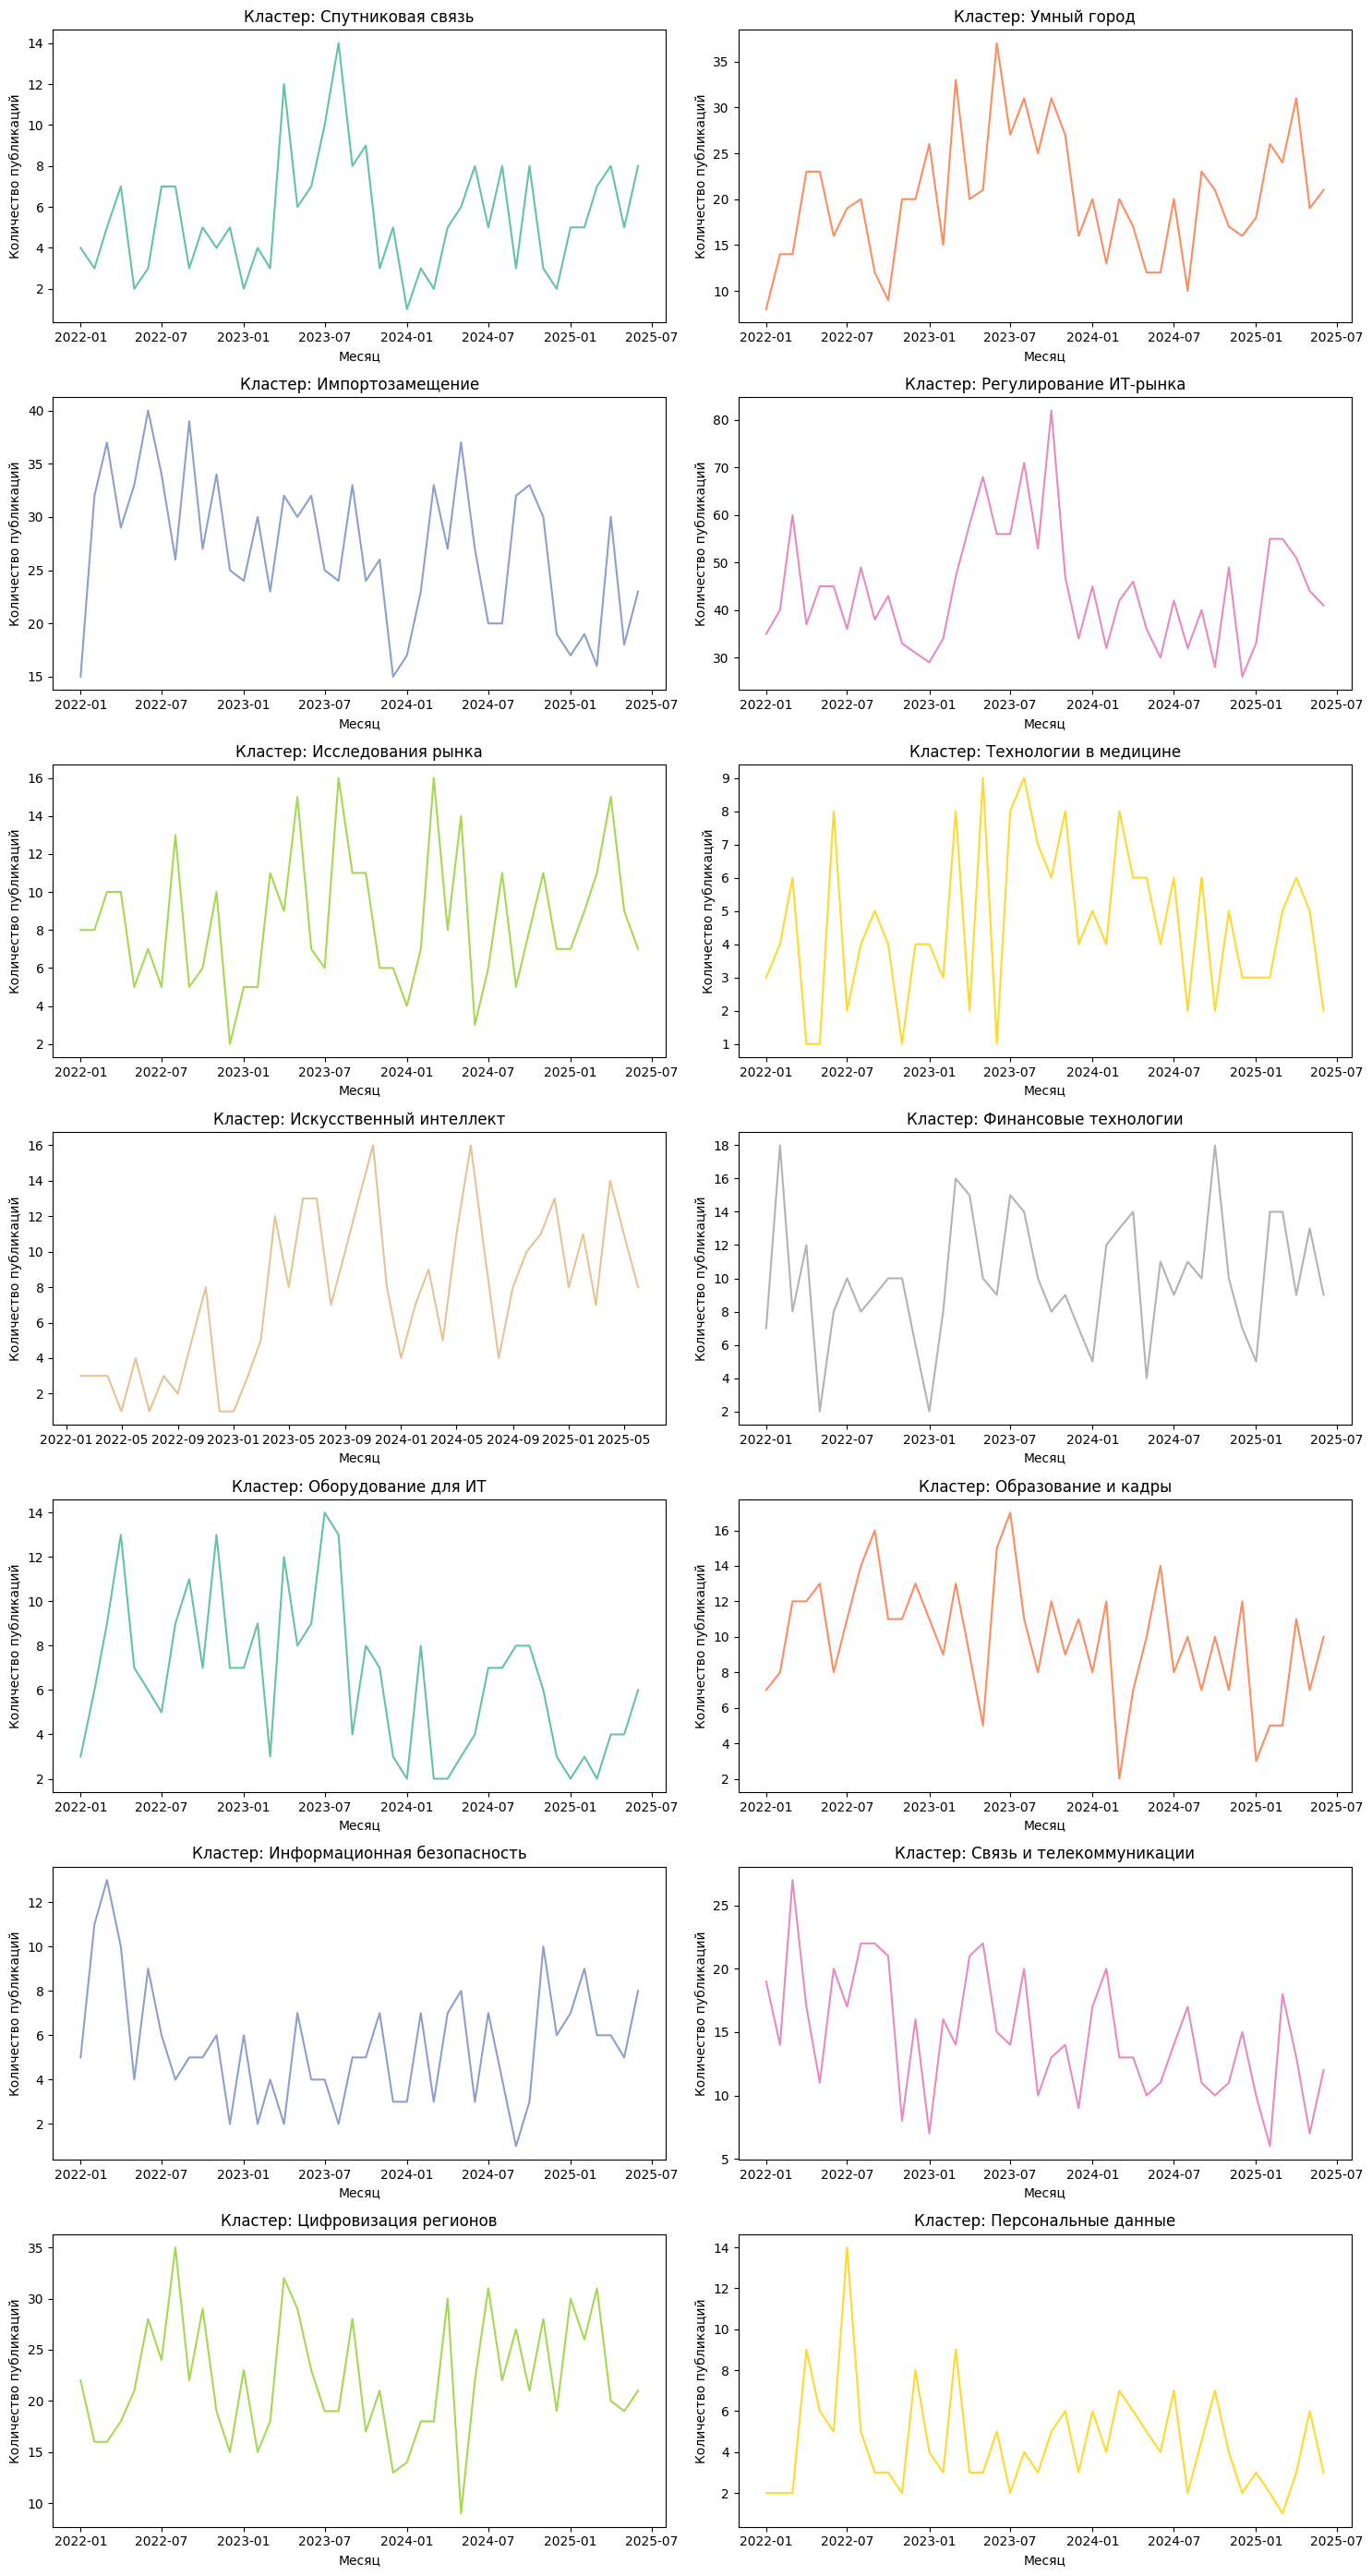

In [179]:
# Настраиваем графики

plt.figure(figsize=(15, 10))
n_clusters = len(clusters)
cols = 2  # число колонок для подграфиков
rows = (n_clusters + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
if n_clusters == 1:
    axes = [axes]

colors = sns.color_palette('Set2', n_clusters)

# Обход по кластерам и построение графиков
for i, (cluster, color) in enumerate(zip(clusters, colors)):
    ax = axes.flat[i]
    subset = df[df['cluster_label'] == cluster]
    # Группируем по году-месяцу
    counts = (subset
              .groupby('year_month')
              .size()
              .reset_index(name='counts'))
    # Преобразуем 'year_month' обратно в datetime для правильного отображения
    counts['date'] = counts['year_month'].dt.to_timestamp()

    sns.lineplot(data=counts, x='date', y='counts', ax=ax, color=color)
    ax.set_title(f'Кластер: {cluster}')
    ax.set_xlabel('Месяц')
    ax.set_ylabel('Количество публикаций')
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))


# Удаляем неиспользуемые графики
for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

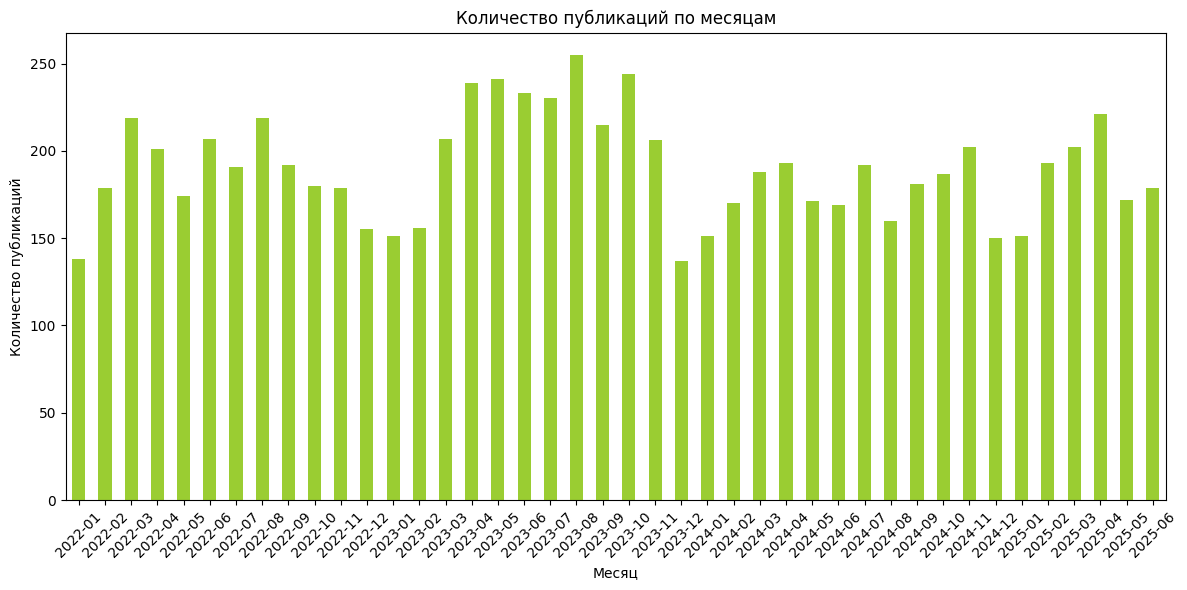

In [180]:
# Дополнительно отрисуем общий график по всем публикациям

counts = df['year_month'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color='yellowgreen')
plt.title('Количество публикаций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество публикаций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Сохраним итоговый датафрейм, чтобы отрисовать более красивые графики в R

In [181]:
#from google.colab import drive
#drive.mount('drive')

In [182]:
#df.to_csv('/content/drive/MyDrive/Comnews_dates_2025.csv', index=False)

In [183]:
#df.to_csv("Comnews_dates_2025.csv", encoding='utf-8', index=False)
#df.to_excel('Comnews_dates_2025.xlsx', index=False)